In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import sqlite3
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,Serial Number,Content,User_Id,Username,Label
0,1,"""Sorry, if you come you will be immediately se...","""25073877""",realdonaldtrump,1
1,2,"""See you on Friday...Big Crowd!","""25073877""",realdonaldtrump,1
2,3,"""True!","""25073877""",realdonaldtrump,1
3,4,"""“NO PRESSURE”""","""25073877""",realdonaldtrump,1
4,5,"""Will be Great!","""25073877""",realdonaldtrump,1
...,...,...,...,...,...
106509,106510,"""A rafflesia that recently bloomed in a West S...","""759251""",cnn,50
106510,106511,"""Kentucky's Attorney General says he's asking ...","""759251""",cnn,50
106511,106512,"""The American Kennel Club has announced two ne...","""759251""",cnn,50
106512,106513,"""Google has disabled access of Xiaomi devices ...","""759251""",cnn,50


In [4]:
#stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer() 
stop_words = stopwords.words("english")
df['cleaned'] = df['Content'].apply(lambda x: " ".join([lemmatizer.lemmatize(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if(i not in stop_words and ("bank" not in i and "Bank" not in i and "BI" not in i))]).lower())

In [5]:
df

,Serial Number,Content,User_Id,Username,Label,cleaned
0,1,"""Sorry, if you come you will be immediately se...","""25073877""",realdonaldtrump,1,sorry come immediately sent back
1,2,"""See you on Friday...Big Crowd!","""25073877""",realdonaldtrump,1,see friday big crowd
2,3,"""True!","""25073877""",realdonaldtrump,1,true
3,4,"""“NO PRESSURE”""","""25073877""",realdonaldtrump,1,no pressure
4,5,"""Will be Great!","""25073877""",realdonaldtrump,1,will great
...,...,...,...,...,...,...
106509,106510,"""A rafflesia that recently bloomed in a West S...","""759251""",cnn,50,a rafflesia recently bloomed west sumatran for...
106510,106511,"""Kentucky's Attorney General says he's asking ...","""759251""",cnn,50,kentucky attorney general say asking investiga...
106511,106512,"""The American Kennel Club has announced two ne...","""759251""",cnn,50,the american kennel club announced two new bre...
106512,106513,"""Google has disabled access of Xiaomi devices ...","""759251""",cnn,50,google disabled access xiaomi device user said...


In [6]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['cleaned']).toarray()
final_features.shape

(106514, 62262)

In [7]:
X = df['cleaned']
Y = df['Label']
print("LOGISTIC REGRESSION")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, Y_train)
with open('MaxEnt.pickle', 'wb') as f:
    pickle.dump(model, f)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, model.predict(X_test)))
print(confusion_matrix(Y_test, model.predict(X_test)))
print("Test Accuracy :",accuracy_score(Y_test, Y_pred))

print("NAIVE BAYES")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', MultinomialNB())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, Y_train)
with open('NaiveBayes.pickle', 'wb') as f:
    pickle.dump(model, f)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, model.predict(X_test)))
print(confusion_matrix(Y_test, model.predict(X_test)))
print("Test Accuracy :",accuracy_score(Y_test, Y_pred))

LOGISTIC REGRESSION


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.58      0.46      0.51       437
           2       0.83      0.72      0.77       820
           3       1.00      0.10      0.18       102
           4       0.30      0.18      0.23       646
           5       0.56      0.44      0.50       767
           6       0.29      0.58      0.39       814
           7       0.49      0.59      0.53       861
           8       0.62      0.42      0.50       801
           9       0.65      0.41      0.50       511
          10       0.73      0.35      0.47       590
          11       0.82      0.66      0.73       846
          12       0.44      0.37      0.40       790
          13       0.81      0.92      0.86       524
          14       0.99      0.39      0.56       779
          15       0.95      0.45      0.61       588
          16       0.90      0.42      0.57       639
          17       0.50      0.19      0.27       793
          18       0.56    

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.95      0.25      0.40       437
           2       0.72      0.75      0.73       820
           3       1.00      0.05      0.09       102
           4       0.37      0.15      0.22       646
           5       0.69      0.33      0.45       767
           6       0.28      0.60      0.38       814
           7       0.52      0.59      0.55       861
           8       0.50      0.42      0.46       801
           9       0.92      0.16      0.27       511
          10       0.81      0.34      0.48       590
          11       0.82      0.66      0.73       846
          12       0.52      0.29      0.37       790
          13       0.85      0.90      0.87       524
          14       0.96      0.39      0.56       779
          15       0.98      0.43      0.60       588
          16       0.88      0.40      0.55       639
          17       0.46      0.18      0.25       793
          18       0.89    

In [8]:
from sklearn.linear_model import SGDClassifier

print("SGD CLASSIFIER")
sgd = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])

sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

print('Test accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

SGD CLASSIFIER
Test accuracy 0.3877014551713347
              precision    recall  f1-score   support

           1       0.66      0.41      0.51       437
           2       0.61      0.75      0.67       820
           3       0.25      0.16      0.19       102
           4       0.11      0.29      0.16       646
           5       0.52      0.43      0.47       767
           6       0.63      0.23      0.34       814
           7       0.64      0.52      0.57       861
           8       0.74      0.36      0.49       801
           9       0.58      0.23      0.33       511
          10       0.62      0.35      0.45       590
          11       0.79      0.65      0.71       846
          12       0.69      0.19      0.30       790
          13       0.54      0.96      0.69       524
          14       0.71      0.40      0.52       779
          15       0.65      0.46      0.54       588
          16       0.47      0.42      0.45       639
          17       0.39      0.16

In [9]:
from gensim.models import Word2Vec
import gensim.models
wv = gensim.models.KeyedVectors.load_word2vec_format("~/Downloads/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [10]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        #logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [11]:
import nltk
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['cleaned']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['cleaned']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['Label'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.Label))
print(classification_report(test.Label, y_pred))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


accuracy 0.4151462994836489
              precision    recall  f1-score   support

           1       0.53      0.51      0.52       437
           2       0.69      0.76      0.73       820
           3       0.82      0.09      0.16       102
           4       0.26      0.24      0.25       646
           5       0.70      0.70      0.70       767
           6       0.33      0.38      0.35       814
           7       0.63      0.60      0.61       861
           8       0.45      0.48      0.47       801
           9       0.39      0.39      0.39       511
          10       0.37      0.33      0.35       590
          11       0.57      0.56      0.56       846
          12       0.45      0.54      0.49       790
          13       0.89      0.94      0.92       524
          14       0.34      0.30      0.32       779
          15       0.15      0.10      0.12       588
          16       0.31      0.17      0.22       639
          17       0.30      0.18      0.22       793

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

'''train_size = int(len(df) * .7)
train_posts = df['cleaned'][:train_size]
tags = df['Username']
y_train = df['Label'][:train_size]

test_posts = df['cleaned'][train_size:]
y_test = df['Label'][train_size:]'''

Y = np.array(df['Label'])
X = np.array(df['cleaned'])
train_posts, test_posts, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

words = []
for index, row in df.iterrows():
    for word in list(map(str,row['cleaned'].split())):
        if word not in words:
            words.append(word)
#print(words)

tokenize = text.Tokenizer(num_words=len(words), char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 100
epochs = 5

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(len(words),)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', recall_m, precision_m, f1_m])
               
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)
#print('Test accuracy:', score[1])
print(score)

Instructions for updating:
Use tf.cast instead.
Train on 67103 samples, validate on 7456 samples
Epoch 1/5
67103/67103 [==============================] - 520s 8ms/step - loss: 2.1328 - acc: 0.4984 - recall_m: 0.2739 - precision_m: 0.8288 - f1_m: 0.3952 - val_loss: 1.4368 - val_acc: 0.6328 - val_recall_m: 0.4607 - val_precision_m: 0.9058 - val_f1_m: 0.6092
Epoch 2/5
67103/67103 [==============================] - 524s 8ms/step - loss: 1.0139 - acc: 0.7460 - recall_m: 0.6051 - precision_m: 0.9448 - f1_m: 0.7365 - val_loss: 1.2658 - val_acc: 0.6571 - val_recall_m: 0.5469 - val_precision_m: 0.8768 - val_f1_m: 0.6726
Epoch 3/5
67103/67103 [==============================] - 530s 8ms/step - loss: 0.6473 - acc: 0.8393 - recall_m: 0.7481 - precision_m: 0.9666 - f1_m: 0.8429 - val_loss: 1.2619 - val_acc: 0.6613 - val_recall_m: 0.5730 - val_precision_m: 0.8561 - val_f1_m: 0.6857
Epoch 4/5
67103/67103 [==============================] - 542s 8ms/step - loss: 0.4771 - acc: 0.8809 - recall_m: 0.8200 -

In [8]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.regularizers import l2

'''train_size = int(len(df) * .7)
train_posts = df['cleaned'][:train_size]
tags = df['Username']
y_train = df['Label'][:train_size]

test_posts = df['cleaned'][train_size:]
y_test = df['Label'][train_size:]'''

Y = np.array(df['Label'])
X = np.array(df['cleaned'])
train_posts, test_posts, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

words = []
for index, row in df.iterrows():
    for word in list(map(str,row['cleaned'].split())):
        if word not in words:
            words.append(word)
#print(words)

tokenize = text.Tokenizer(num_words=len(words), char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 100
epochs = 5

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(len(words),)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
#model.add(Activation('softmax'))
model.add(Activation('linear'))

model.compile(loss='hinge',
              optimizer='adadelta',
              metrics=['accuracy',precision_m,recall_m,f1_m])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)
#print('Test accuracy:', score[1])
print(score)

Train on 67103 samples, validate on 7456 samples
Epoch 1/5
67103/67103 [==============================] - 621s 9ms/step - loss: 0.9908 - acc: 0.0599 - precision_m: 0.0283 - recall_m: 0.4190 - f1_m: 0.0310 - val_loss: 0.9803 - val_acc: 0.1528 - val_precision_m: 0.0208 - val_recall_m: 0.9964 - val_f1_m: 0.0407
Epoch 2/5
67103/67103 [==============================] - 612s 9ms/step - loss: 0.9802 - acc: 0.0554 - precision_m: 0.0206 - recall_m: 0.9961 - f1_m: 0.0404 - val_loss: 0.9800 - val_acc: 0.1656 - val_precision_m: 0.0206 - val_recall_m: 0.9977 - val_f1_m: 0.0404
Epoch 3/5
67103/67103 [==============================] - 618s 9ms/step - loss: 0.9801 - acc: 0.0499 - precision_m: 0.0203 - recall_m: 0.9990 - f1_m: 0.0397 - val_loss: 0.9800 - val_acc: 0.1674 - val_precision_m: 0.0201 - val_recall_m: 0.9993 - val_f1_m: 0.0394
Epoch 4/5
67103/67103 [==============================] - 607s 9ms/step - loss: 0.9800 - acc: 0.0497 - precision_m: 0.0201 - recall_m: 0.9996 - f1_m: 0.0394 - val_loss: 

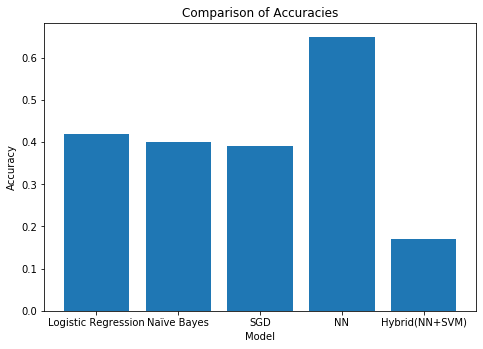

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Y_plot = [0.42,0.40,0.39,0.65,0.17]
X_plot = ["Logistic Regression","Naïve Bayes","SGD","NN","Hybrid(NN+SVM)"]
ax.bar(X_plot,Y_plot)
plt.title("Comparison of Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

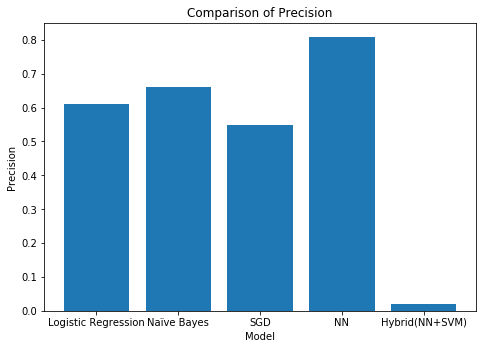

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Y_plot = [0.61,0.66,0.55,0.81,0.02]
X_plot = ["Logistic Regression","Naïve Bayes","SGD","NN","Hybrid(NN+SVM)"]
ax.bar(X_plot,Y_plot)
plt.title("Comparison of Precision")
plt.ylabel("Precision")
plt.xlabel("Model")
plt.show()

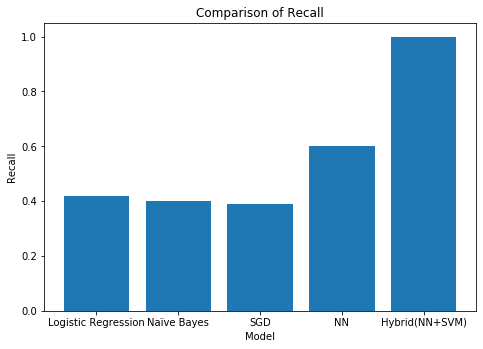

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Y_plot = [0.42,0.40,0.39,0.60,1.0]
X_plot = ["Logistic Regression","Naïve Bayes","SGD","NN","Hybrid(NN+SVM)"]
ax.bar(X_plot,Y_plot)
plt.title("Comparison of Recall")
plt.ylabel("Recall")
plt.xlabel("Model")
plt.show()

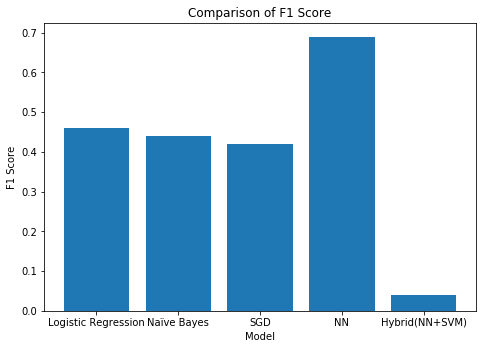

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Y_plot = [0.46,0.44,0.42,0.69,0.04]
X_plot = ["Logistic Regression","Naïve Bayes","SGD","NN","Hybrid(NN+SVM)"]
ax.bar(X_plot,Y_plot)
plt.title("Comparison of F1 Score")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.show()

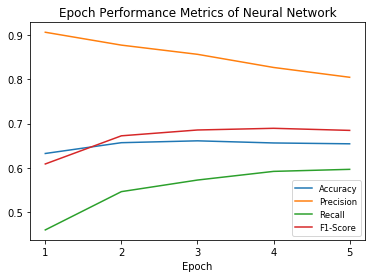

In [25]:
'''Epoch 1/5
67103/67103 [==============================] - 520s 8ms/step - loss: 2.1328 - acc: 0.4984 - recall_m: 0.2739 - precision_m: 0.8288 - f1_m: 0.3952 - val_loss: 1.4368 - val_acc: 0.6328 - val_recall_m: 0.4607 - val_precision_m: 0.9058 - val_f1_m: 0.6092
Epoch 2/5
67103/67103 [==============================] - 524s 8ms/step - loss: 1.0139 - acc: 0.7460 - recall_m: 0.6051 - precision_m: 0.9448 - f1_m: 0.7365 - val_loss: 1.2658 - val_acc: 0.6571 - val_recall_m: 0.5469 - val_precision_m: 0.8768 - val_f1_m: 0.6726
Epoch 3/5
67103/67103 [==============================] - 530s 8ms/step - loss: 0.6473 - acc: 0.8393 - recall_m: 0.7481 - precision_m: 0.9666 - f1_m: 0.8429 - val_loss: 1.2619 - val_acc: 0.6613 - val_recall_m: 0.5730 - val_precision_m: 0.8561 - val_f1_m: 0.6857
Epoch 4/5
67103/67103 [==============================] - 542s 8ms/step - loss: 0.4771 - acc: 0.8809 - recall_m: 0.8200 - precision_m: 0.9754 - f1_m: 0.8906 - val_loss: 1.3157 - val_acc: 0.6565 - val_recall_m: 0.5925 - val_precision_m: 0.8265 - val_f1_m: 0.6895
Epoch 5/5
67103/67103 [==============================] - 527s 8ms/step - loss: 0.3879 - acc: 0.9004 - recall_m: 0.8603 - precision_m: 0.9808 - f1_m: 0.9163 - val_loss: 1.3806 - val_acc: 0.6546 - val_recall_m: 0.5971 - val_precision_m: 0.8044 - val_f1_m: 0.6848'''

plt.title("Epoch Performance Metrics of Neural Network")
val_accs = [0.6328, 0.6571, 0.6613, 0.6565, 0.6546]
epochs = [str(i) for i in range(1,6)]
#plt.title("Epoch Accuracies for Neural Network")
#plt.ylabel("Accuracy")
plt.xlabel("Epoch")
line1, = plt.plot(epochs, val_accs)

val_precs = [0.9058, 0.8768, 0.8561, 0.8265, 0.8044]
epochs = [str(i) for i in range(1,6)]
#plt.title("Epoch Precisions for Neural Network")
#plt.ylabel("Precision")
plt.xlabel("Epoch")
line2, = plt.plot(epochs, val_precs)

val_recs = [0.4607, 0.5469, 0.5730, 0.5925, 0.5971]
epochs = [str(i) for i in range(1,6)]
#plt.title("Epoch Recalls for Neural Network")
#plt.ylabel("Recall")
plt.xlabel("Epoch")
line3, = plt.plot(epochs, val_recs)

val_f1s = [0.6092, 0.6726, 0.6857, 0.6895, 0.6848]
epochs = [str(i) for i in range(1,6)]
#plt.title("Epoch F1 Scores for Neural Network")
#plt.ylabel("F1 Score")
plt.xlabel("Epoch")
line4, = plt.plot(epochs, val_f1s)

plt.legend((line1, line2, line3, line4), ('Accuracy', 'Precision', 'Recall', 'F1-Score'), loc=4, fontsize="small")

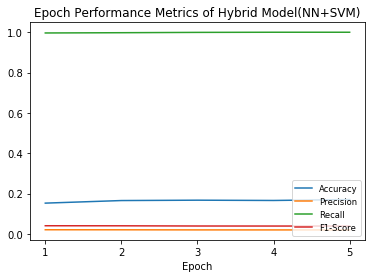

In [27]:
'''Train on 67103 samples, validate on 7456 samples
Epoch 1/5
67103/67103 [==============================] - 621s 9ms/step - loss: 0.9908 - acc: 0.0599 - precision_m: 0.0283 - recall_m: 0.4190 - f1_m: 0.0310 - val_loss: 0.9803 - val_acc: 0.1528 - val_precision_m: 0.0208 - val_recall_m: 0.9964 - val_f1_m: 0.0407
Epoch 2/5
67103/67103 [==============================] - 612s 9ms/step - loss: 0.9802 - acc: 0.0554 - precision_m: 0.0206 - recall_m: 0.9961 - f1_m: 0.0404 - val_loss: 0.9800 - val_acc: 0.1656 - val_precision_m: 0.0206 - val_recall_m: 0.9977 - val_f1_m: 0.0404
Epoch 3/5
67103/67103 [==============================] - 618s 9ms/step - loss: 0.9801 - acc: 0.0499 - precision_m: 0.0203 - recall_m: 0.9990 - f1_m: 0.0397 - val_loss: 0.9800 - val_acc: 0.1674 - val_precision_m: 0.0201 - val_recall_m: 0.9993 - val_f1_m: 0.0394
Epoch 4/5
67103/67103 [==============================] - 607s 9ms/step - loss: 0.9800 - acc: 0.0497 - precision_m: 0.0201 - recall_m: 0.9996 - f1_m: 0.0394 - val_loss: 0.9800 - val_acc: 0.1660 - val_precision_m: 0.0200 - val_recall_m: 1.0000 - val_f1_m: 0.0392
Epoch 5/5
67103/67103 [==============================] - 611s 9ms/step - loss: 0.9800 - acc: 0.0496 - precision_m: 0.0201 - recall_m: 0.9999 - f1_m: 0.0393 - val_loss: 0.9800 - val_acc: 0.1706 - val_precision_m: 0.0200 - val_recall_m: 1.0000 - val_f1_m: 0.0392'''

plt.title("Epoch Performance Metrics of Hybrid Model(NN+SVM)")
val_accs = [0.1528,0.1656,0.1674,0.1660,0.1706]
epochs = [str(i) for i in range(1,6)]
#plt.title("Epoch Accuracies for Neural Network")
#plt.ylabel("Accuracy")
plt.xlabel("Epoch")
line1, = plt.plot(epochs, val_accs)

val_precs = [0.0208,0.0206,0.0201,0.0200,0.0200]
epochs = [str(i) for i in range(1,6)]
#plt.title("Epoch Precisions for Neural Network")
#plt.ylabel("Precision")
plt.xlabel("Epoch")
line2, = plt.plot(epochs, val_precs)

val_recs = [0.9964,0.9977,0.9993,1.0000,1.0000]
epochs = [str(i) for i in range(1,6)]
#plt.title("Epoch Recalls for Neural Network")
#plt.ylabel("Recall")
plt.xlabel("Epoch")
line3, = plt.plot(epochs, val_recs)

val_f1s = [0.0407,0.0404,0.0394,0.0392,0.0392]
epochs = [str(i) for i in range(1,6)]
#plt.title("Epoch F1 Scores for Neural Network")
#plt.ylabel("F1 Score")
plt.xlabel("Epoch")
line4, = plt.plot(epochs, val_f1s)

plt.legend((line1, line2, line3, line4), ('Accuracy', 'Precision', 'Recall', 'F1-Score'), loc=4, fontsize="small")